In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [20]:
file_path = 'excel di backup(5).csv'
df = pd.read_csv(file_path)

In [40]:
ground_truth = df['Diagnosi'].astype(str)
pred_IA = df['Diagnosi AI'].astype(str)
labels = ['TRAUM', 'NEOPL', 'AFTA'] 
cm_IA = confusion_matrix(ground_truth, pred_IA, labels=labels)
df_cm_IA = pd.DataFrame(cm_IA, index=labels, columns=labels)
print("Matrice di confusione IA:")
print(df_cm_IA)

Matrice di confusione IA:
       TRAUM  NEOPL  AFTA
TRAUM     20      0    20
NEOPL     10     20    10
AFTA      10      0    10


In [42]:
ground_truth = df['Diagnosi'].astype(str)
pred_user_pre_IA = df['Diagnosi Ut'].astype(str)

In [43]:
labels = ['TRAUM', 'NEOPL', 'AFTA'] 
cm_pre_IA = confusion_matrix(ground_truth, pred_user_pre_IA, labels=labels)

In [44]:
df_cm_pre_IA = pd.DataFrame(cm_pre_IA, index=labels, columns=labels)
print("Matrice di confusione pre-IA:")
print(df_cm_pre_IA)

Matrice di confusione pre-IA:
       TRAUM  NEOPL  AFTA
TRAUM     22     10     8
NEOPL      4     34     2
AFTA       1      0    19


In [45]:
ground_truth = df['Diagnosi'].astype(str)
pred_user_post_IA = df['Diagnosi dopo rivalutazione?'].astype(str)

In [46]:
cm_post_IA = confusion_matrix(ground_truth, pred_user_post_IA, labels=labels)

In [49]:
df_cm_post_IA = pd.DataFrame(cm_post_IA, index=labels, columns=labels)
print("Matrice di confusione post-IA (senza divisione interfacce):")
print(df_cm_post_IA)

Matrice di confusione post-IA (senza divisione interfacce):
       TRAUM  NEOPL  AFTA
TRAUM     23      6    11
NEOPL      1     37     2
AFTA       1      0    18


In [51]:
df['Interfaccia'] = df['Interfaccia'].astype(str)

df['Diagnosi'] = df['Diagnosi'].astype(str)
df['Diagnosi dopo rivalutazione?'] = df['Diagnosi dopo rivalutazione?'].astype(str)

#filtraggio interfacce
data_interface_1 = df[df['Interfaccia'] == '1']
data_interface_2 = df[df['Interfaccia'] == '2']


ground_truth_interface_1 = data_interface_1['Diagnosi']
pred_user_post_IA_interface_1 = data_interface_1['Diagnosi dopo rivalutazione?']

ground_truth_interface_2 = data_interface_2['Diagnosi']
pred_user_post_IA_interface_2 = data_interface_2['Diagnosi dopo rivalutazione?']


labels = ['TRAUM', 'NEOPL', 'AFTA'] 
cm_interface_1 = confusion_matrix(ground_truth_interface_1, pred_user_post_IA_interface_1, labels=labels)
cm_interface_2 = confusion_matrix(ground_truth_interface_2, pred_user_post_IA_interface_2, labels=labels)



In [52]:
df_cm_post_IA_1 = pd.DataFrame(cm_interface_1, index=labels, columns=labels)
print("Matrice di confusione post-IA - Prima interfaccia:")
print(df_cm_post_IA_1)

Matrice di confusione post-IA - Prima interfaccia:
       TRAUM  NEOPL  AFTA
TRAUM      8      0     8
NEOPL      1     22     0
AFTA       0      0    10


In [53]:
df_cm_post_IA_2 = pd.DataFrame(cm_interface_2, index=labels, columns=labels)
print("Matrice di confusione post-IA - Seconda interfaccia:")
print(df_cm_post_IA_2)

Matrice di confusione post-IA - Seconda interfaccia:
       TRAUM  NEOPL  AFTA
TRAUM     15      6     3
NEOPL      0     15     2
AFTA       1      0     8


In [56]:
# Calculate metrics

df['Diagnosi'] = df['Diagnosi'].astype(str)
df['Diagnosi Ut'] = df['Diagnosi Ut'].astype(str)
df['Diagnosi AI'] = df['Diagnosi AI'].astype(str)
df['Diagnosi dopo rivalutazione?'] = df['Diagnosi dopo rivalutazione?'].astype(str)
df['Interfaccia'] = df['Interfaccia'].astype(str)

#Accuratezza AI
accuracy_AI = accuracy_score(df['Diagnosi'], df['Diagnosi AI'])
#Accuratezza Utente
accuracy_user = accuracy_score(df['Diagnosi'], df['Diagnosi Ut'])
#Accuratezza Utente dopo IA
accuracy_user_post_IA = accuracy_score(df['Diagnosi'], df['Diagnosi dopo rivalutazione?'])


df_int_1 = df[df['Interfaccia'] == '1']
df_int_2 = df[df['Interfaccia'] == '2']

#Accuratezza Utente dopo IA con prima interfaccia
accuracy_user_post_IA_int_1 = accuracy_score(df_int_1['Diagnosi'], df_int_1['Diagnosi dopo rivalutazione?'])

#Accuratezza Utente dopo IA con seconda interfaccia
accuracy_user_post_IA_int_2 = accuracy_score(df_int_2['Diagnosi'], df_int_2['Diagnosi dopo rivalutazione?'])


print(f"Accuracy AI: {accuracy_AI:.2f}")
print(f"Accuracy Utente: {accuracy_user:.2f}")
print(f"Accuracy Utente Dopo IA: {accuracy_user_post_IA:.2f}")
print(f"Accuracy Utente Dopo IA - Interfaccia 1: {accuracy_user_post_IA_int_1:.2f}")
print(f"Accuracy Utente Dopo IA - Interfaccia 2: {accuracy_user_post_IA_int_2:.2f}")


#Precision AI
precision_AI = precision_score(df['Diagnosi'], df['Diagnosi AI'], average='macro')

#Precision utente
precision_user = precision_score(df['Diagnosi'], df['Diagnosi Ut'], average='macro')

#Precision Utente dopo IA
precision_user_post_AI = precision_score(df['Diagnosi'], df['Diagnosi dopo rivalutazione?'], average='macro')

#Precision Utente dopo IA con prima interfaccia
precision_user_post_IA_int_1 = precision_score(df_int_1['Diagnosi'], df_int_1['Diagnosi dopo rivalutazione?'], average='macro')

#Precision Utente dopo IA con seconda interfaccia
precision_user_post_IA_int_2 = precision_score(df_int_2['Diagnosi'], df_int_2['Diagnosi dopo rivalutazione?'], average='macro')

print(f"Precision AI: {precision_AI:.2f}")
print(f"Precision Utente: {precision_user:.2f}")
print(f"Precision Utente dopo IA: {precision_user_post_AI:.2f}")
print(f"Precision Utente Dopo IA - Interfaccia 1: {precision_user_post_IA_int_1:.2f}")
print(f"Precision Utente Dopo IA - Interfaccia 2: {precision_user_post_IA_int_2:.2f}")


#Recall AI
recall_AI = recall_score(df['Diagnosi'], df['Diagnosi AI'], average='macro')

#Recall utente
recall_user = recall_score(df['Diagnosi'], df['Diagnosi Ut'], average='macro')

#Recall Utente dopo IA
recall_user_post_AI = recall_score(df['Diagnosi'], df['Diagnosi dopo rivalutazione?'], average='macro')

#Recall Utente dopo IA con prima interfaccia
recall_user_post_IA_int_1 = recall_score(df_int_1['Diagnosi'], df_int_1['Diagnosi dopo rivalutazione?'], average='macro')

#Recall Utente dopo IA con seconda interfaccia
recall_user_post_IA_int_2 = recall_score(df_int_2['Diagnosi'], df_int_2['Diagnosi dopo rivalutazione?'], average='macro')

print(f"Recall AI: {recall_AI:.2f}")
print(f"Recall Utente: {recall_user:.2f}")
print(f"Recall Utente dopo IA: {recall_user_post_AI:.2f}")
print(f"Recall Utente Dopo IA - Interfaccia 1: {recall_user_post_IA_int_1:.2f}")
print(f"Recall Utente Dopo IA - Interfaccia 2: {recall_user_post_IA_int_2:.2f}")


#f1 AI
f1_AI = f1_score(df['Diagnosi'], df['Diagnosi AI'], average='macro')

#f1 utente
f1_user = f1_score(df['Diagnosi'], df['Diagnosi Ut'], average='macro')

#f1 Utente dopo IA
f1_user_post_AI = f1_score(df['Diagnosi'], df['Diagnosi dopo rivalutazione?'], average='macro')

#f1 Utente dopo IA con prima interfaccia
f1_user_post_IA_int_1 = f1_score(df_int_1['Diagnosi'], df_int_1['Diagnosi dopo rivalutazione?'], average='macro')

#f1 Utente dopo IA con seconda interfaccia
f1_user_post_IA_int_2 = f1_score(df_int_2['Diagnosi'], df_int_2['Diagnosi dopo rivalutazione?'], average='macro')

print(f"f1 AI: {f1_AI:.2f}")
print(f"f1 Utente: {f1_user:.2f}")
print(f"f1 Utente dopo IA: {f1_user_post_AI:.2f}")
print(f"f1 Utente Dopo IA - Interfaccia 1: {f1_user_post_IA_int_1:.2f}")
print(f"f1 Utente Dopo IA - Interfaccia 2: {f1_user_post_IA_int_2:.2f}")

Accuracy AI: 0.50
Accuracy Utente: 0.75
Accuracy Utente Dopo IA: 0.78
Accuracy Utente Dopo IA - Interfaccia 1: 0.80
Accuracy Utente Dopo IA - Interfaccia 2: 0.76
Precision AI: 0.58
Precision Utente: 0.75
Precision Utente dopo IA: 0.59
Precision Utente Dopo IA - Interfaccia 1: 0.61
Precision Utente Dopo IA - Interfaccia 2: 0.76
Recall AI: 0.50
Recall Utente: 0.78
Recall Utente dopo IA: 0.60
Recall Utente Dopo IA - Interfaccia 1: 0.59
Recall Utente Dopo IA - Interfaccia 2: 0.80
f1 AI: 0.50
f1 Utente: 0.75
f1 Utente dopo IA: 0.58
f1 Utente Dopo IA - Interfaccia 1: 0.58
f1 Utente Dopo IA - Interfaccia 2: 0.76


C:\Users\Miriana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Miriana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
partecipanti = df.groupby('Partecipante')

#accuratezza pre-IA di ogni partecipante
user_accuracies = partecipanti.apply(lambda x: accuracy_score(x['Diagnosi'], x['Diagnosi Ut']))
#accuratezza post-IA di ogni partecipante
user_accuracies_post_IA = partecipanti.apply(lambda x: accuracy_score(x['Diagnosi'], x['Diagnosi dopo rivalutazione?']))

accuracy_df = pd.DataFrame({
    'User Accuracy': user_accuracies,
    'User Accuracy Post IA': user_accuracies_post_IA
    
})

accuracy_df['Esperienza'] = df.groupby('Partecipante')['Esperienza'].first()

print(accuracy_df)


              User Accuracy  User Accuracy Post IA      Esperienza
Partecipante                                                      
Amadasi                 0.9                    0.8   Oltre 10 anni
Figliè                  0.8                    0.8  Meno di 1 anno
Gianninoni              0.7                    0.8        Studente
Gragnoli                0.6                    0.8        1-5 anni
Grosso                  0.6                    0.7        Studente
Palomba A.              0.8                    0.9  Meno di 1 anno
Palomba G.              0.9                    0.8        1-5 anni
Petrigliano             0.9                    0.9   Oltre 10 anni
Solinas                 0.6                    0.6        Studente
Turchi                  0.7                    0.7   Oltre 10 anni


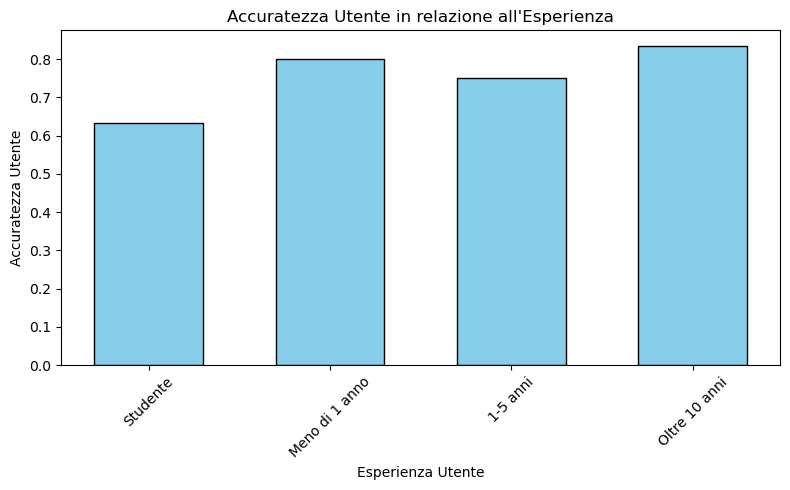

In [57]:
aggregated_df = accuracy_df.groupby('Esperienza').agg({'User Accuracy': 'mean'}).reset_index()

order = ['Studente', 'Meno di 1 anno', '1-5 anni', 'Oltre 10 anni']

#riordino il df in base alle etichette
aggregated_df = aggregated_df.set_index('Esperienza').loc[order].reset_index()


plt.figure(figsize=(8, 5))  
x = aggregated_df['Esperienza']
y = aggregated_df['User Accuracy']

#larghezza barre
bar_width = 0.6

plt.bar(x, y, width=bar_width, color='skyblue', edgecolor='black')

plt.xlabel('Esperienza Utente')
plt.ylabel('Accuratezza Utente')
plt.title('Accuratezza Utente in relazione all\'Esperienza')
plt.xticks(x, rotation=45)  

plt.tight_layout()
plt.show()

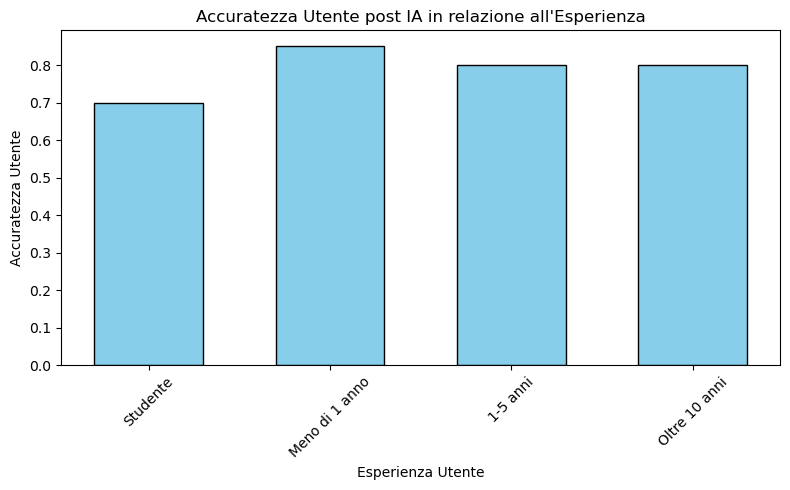

In [58]:
aggregated_df = accuracy_df.groupby('Esperienza').agg({'User Accuracy Post IA': 'mean'}).reset_index()

order = ['Studente', 'Meno di 1 anno', '1-5 anni', 'Oltre 10 anni']

#riordino il df in base alle etichette
aggregated_df = aggregated_df.set_index('Esperienza').loc[order].reset_index()

plt.figure(figsize=(8, 5)) 
x = aggregated_df['Esperienza']
y = aggregated_df['User Accuracy Post IA']

#larghezza barre
bar_width = 0.6

plt.bar(x, y, width=bar_width, color='skyblue', edgecolor='black')
plt.xlabel('Esperienza Utente')
plt.ylabel('Accuratezza Utente')
plt.title('Accuratezza Utente post IA in relazione all\'Esperienza')
plt.xticks(x, rotation=45) 

plt.tight_layout()
plt.show()